# Project Introduction and Overview

This project delves into the realm of supervised machine learning with a specific focus on predicting the acceptance of coupons by drivers. The task involves analyzing various factors, including personal traits and situational conditions, to understand their impact on coupon acceptance. The ultimate objective is to enhance the effectiveness of coupon distribution by identifying the most influential factors.

The dataset is sourced from the UCI Machine Learning Repository. Although the specifics of the data collection process are not detailed in the original dataset, it's assumed to be a comprehensive compilation of various driving scenarios and personal preferences, possibly gathered through surveys or experimental setups.https://archive.ics.uci.edu/ 

The dataset is robust, consisting of 12,684 rows and 25 features, encompassing categorical and numerical data. This includes critical factors like destination, weather, and types of coupons offered, providing a well-rounded view for analysis:
    *This dataset is using "in-vehicle coupon recommendation Data Set" UCI dataset.*
    
With the following 
            Attribute Information:

        destination: No Urgent Place, Home, Work
        passanger: Alone, Friend(s), Kid(s), Partner (who are the passengers in the car)
        weather: Sunny, Rainy, Snowy
        temperature:55, 80, 30
        time: 2PM, 10AM, 6PM, 7AM, 10PM
        coupon: Restaurant(<$20), Coffee House, Carry out & Take away, Bar, Restaurant($20-$50)
    expiration: 1d, 2h (the coupon expires in 1 day or in 2 hours)
    gender: Female, Male
    age: 21, 46, 26, 31, 41, 50plus, 36, below21
    maritalStatus: Unmarried partner, Single, Married partner, Divorced, Widowed
    has_Children:1, 0
    education: Some college - no degree, Bachelors degree, Associates degree, High School Graduate, Graduate degree (Masters or Doctorate), Some High School
    occupation: Unemployed, Architecture & Engineering, Student,
    Education&Training&Library, Healthcare Support,
    Healthcare Practitioners & Technical, Sales & Related, Management,
    Arts Design Entertainment Sports & Media, Computer & Mathematical,
    Life Physical Social Science, Personal Care & Service,
    Community & Social Services, Office & Administrative Support,
    Construction & Extraction, Legal, Retired,
    Installation Maintenance & Repair, Transportation & Material Moving,
    Business & Financial, Protective Service,
    Food Preparation & Serving Related, Production Occupations,
    Building & Grounds Cleaning & Maintenance, Farming Fishing & Forestry
    income: $37500 - $49999, $62500 - $74999, $12500 - $24999, $75000 - $87499,
    $50000 - $62499, $25000 - $37499, $100000 or More, $87500 - $99999, Less than $12500
    Bar: never, less1, 1~3, gt8, nan4~8 (feature meaning: how many times do you go to a bar every month?)
    CoffeeHouse: never, less1, 4~8, 1~3, gt8, nan (feature meaning: how many times do you go to a coffeehouse every month?)
    CarryAway:n4~8, 1~3, gt8, less1, never (feature meaning: how many times do you get take-away food every month?)
    RestaurantLessThan20: 4~8, 1~3, less1, gt8, never (feature meaning: how many times do you go to a restaurant with an average expense per person of less than $20 every month?)
    Restaurant20To50: 1~3, less1, never, gt8, 4~8, nan (feature meaning: how many times do you go to a restaurant with average expense per person of $20 - $50 every month?)
    toCoupon_GEQ15min:0,1 (feature meaning: driving distance to the restaurant/bar for using the coupon is greater than 15 minutes)
    toCoupon_GEQ25min:0, 1 (feature meaning: driving distance to the restaurant/bar for using the coupon is greater than 25 minutes)
    direction_same:0, 1 (feature meaning: whether the restaurant/bar is in the same direction as your current destination)
    direction_opp:1, 0 (feature meaning: whether the restaurant/bar is in the same direction as your current destination)
    Y:1, 0 (whether the coupon is accepted)
Source: https://archive.ics.uci.edu/ml/datasets/Bank+Marketing

Citation: [Moro et al., 2014] S. Moro, P. Cortez and P. Rita. A Data-Driven Approach to Predict the Success of Bank Telemarketing. Decision Support Systems, Elsevier, 62:22-31, June 2014

# Project Summary

## Enhanced Project Goal
The aim here is not only to forecast coupon acceptance but also to understand the interplay of various factors, such as weather conditions and proximity to the establishment, in influencing this decision. This insight can significantly aid businesses in optimizing their coupon distribution strategy, ensuring that offers reach those most likely to be interested.

## Main model
The main model I will use is a Data Tree Classifier as it utilizes all the features provided in the data, and will also help me to find the most important features. 

Note: While deciding when and where to give out coupons the employees will not be able to have personal trait details, but given the insight into the data we will be able to at least provide them with insight into external factors. 

## Import Libraries and Data
We start with importing necessary libraries:

In [2]:
%matplotlib inline
import sklearn
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
import numpy as np
import scipy as sp
import scipy.stats as stats
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
# Set color map to have light blue background
sns.set()
import statsmodels.formula.api as smf
import statsmodels.api as sm
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, make_scorer
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import f1_score
from sklearn import tree


Source: https://archive.ics.uci.edu/ml/datasets/Bank+Marketing

### Data Import

In this section, we import the dataset from the UCI Machine Learning Repository, known for its rich collection of datasets for various machine learning tasks. A preliminary examination of the data is conducted to understand its structure and content. This dataset encompasses several attributes, ranging from weather conditions to personal traits of individuals, providing a comprehensive view for our analysis."

In [3]:
df = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/00603/in-vehicle-coupon-recommendation.csv')

Below we see a sample of the data

In [4]:
df.head()

,destination,passanger,weather,temperature,time,coupon,expiration,gender,age,maritalStatus,...,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y
0,No Urgent Place,Alone,Sunny,55,2PM,Restaurant(<20),1d,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,0,0,0,1,1
1,No Urgent Place,Friend(s),Sunny,80,10AM,Coffee House,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,0,0,0,1,0
2,No Urgent Place,Friend(s),Sunny,80,10AM,Carry out & Take away,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,1
3,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,0
4,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,1d,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,0


There doesn't seem to be any NULL values but they are set to unknown

In [6]:
print(df.info())
df.describe()

df['CarryAway'].value_counts()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12684 entries, 0 to 12683
Data columns (total 26 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   destination           12684 non-null  object
 1   passanger             12684 non-null  object
 2   weather               12684 non-null  object
 3   temperature           12684 non-null  int64 
 4   time                  12684 non-null  object
 5   coupon                12684 non-null  object
 6   expiration            12684 non-null  object
 7   gender                12684 non-null  object
 8   age                   12684 non-null  object
 9   maritalStatus         12684 non-null  object
 10  has_children          12684 non-null  int64 
 11  education             12684 non-null  object
 12  occupation            12684 non-null  object
 13  income                12684 non-null  object
 14  car                   108 non-null    object
 15  Bar                   12577 non-null

CarryAway
1~3      4672
4~8      4258
less1    1856
gt8      1594
never     153
Name: count, dtype: int64

We initially have 25 features with 12684 rows, as we go through data cleaning this may change. Please find the description for each feature above.

### Data Cleaning

We want to find the columns that have null values and the course of action for each.
Data cleaning is a crucial step in any data science project. Here, we meticulously clean the dataset by removing columns with a significant proportion of missing values and imputing others with more manageable levels of missing data. This careful process ensures the reliability and integrity of our dataset, paving the way for more accurate analysis and modeling.

In [8]:
# Initialize list to store columns to be dropped
columns_to_drop = []

# Iterate over columns and check null values
for c in df.columns:
    null_percentage = df[c].isnull().sum() / len(df)
    if 0 < null_percentage <= 0.05:
        print(f"Impute column '{c}' - Percentage of null values: {null_percentage}")
    elif null_percentage > 0.05:
        print(f"Drop column '{c}' - Percentage of null values: {null_percentage}")
        columns_to_drop.append(c)

# Drop columns with high null percentage
df.drop(columns=columns_to_drop, inplace=True)


Drop column 'car' - Percentage of null values: 0.9914853358561968
Impute column 'Bar' - Percentage of null values: 0.008435824660990224
Impute column 'CoffeeHouse' - Percentage of null values: 0.017108167770419427
Impute column 'CarryAway' - Percentage of null values: 0.011904761904761904
Impute column 'RestaurantLessThan20' - Percentage of null values: 0.010249132765689057
Impute column 'Restaurant20To50' - Percentage of null values: 0.014900662251655629


In [10]:
#Impute the remaining columns with null values
cols = df.columns
feats_w_null = []
for c in df.columns:
    if df[c].isnull().sum() > 0:
        feats_w_null.append(c)


print(feats_w_null)


['Bar', 'CoffeeHouse', 'CarryAway', 'RestaurantLessThan20', 'Restaurant20To50']


In [11]:
#For each column in feats_w_null we get the mode and replace all null values with the most common entry

for x in feats_w_null:
    replacement = df[x].mode()
    df[x].fillna(replacement[0], inplace=True)
    print("Filled nulls for", x)


Filled nulls for Bar
Filled nulls for CoffeeHouse
Filled nulls for CarryAway
Filled nulls for RestaurantLessThan20
Filled nulls for Restaurant20To50


In [12]:
for c in df.columns:
    if(df[c].isnull().sum() / len(df) >0 and df[c].isnull().sum() / len(df) <= .05):
        print("Impute: ",c)
    elif (df[c].isnull().sum() / len(df)) > .05:
        print("Drop :", c)

In [10]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12684 entries, 0 to 12683
Data columns (total 25 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   destination           12684 non-null  object
 1   passanger             12684 non-null  object
 2   weather               12684 non-null  object
 3   temperature           12684 non-null  int64 
 4   time                  12684 non-null  object
 5   coupon                12684 non-null  object
 6   expiration            12684 non-null  object
 7   gender                12684 non-null  object
 8   age                   12684 non-null  object
 9   maritalStatus         12684 non-null  object
 10  has_children          12684 non-null  int64 
 11  education             12684 non-null  object
 12  occupation            12684 non-null  object
 13  income                12684 non-null  object
 14  Bar                   12684 non-null  object
 15  CoffeeHouse           12684 non-null

After data cleaning, we now have no null values and 24 features with the same number of rows. 

<h3>Exploratory Data Analysis</h3>

### Detailed Visualization and Analysis
Through a series of pie charts and bar graphs, we explored features like 'destination' and 'weather'. This revealed interesting patterns, such as a 50/50 split in coupon acceptance based on weather, suggesting that external conditions might not significantly sway decision-making in coupon acceptance.

#### Destination

<Axes: ylabel='count'>

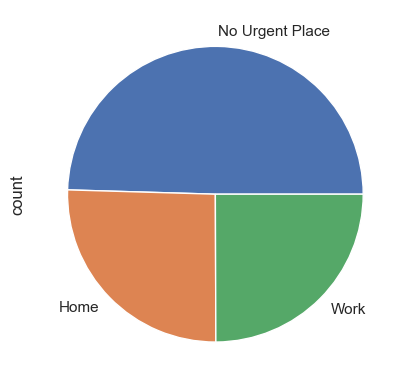

In [21]:
df['destination'].value_counts().plot( kind='pie')


In [22]:
destination = df.groupby(['destination', 'Y']).size().unstack()
destination

Y,0,1
destination,,
Home,1598,1639
No Urgent Place,2301,3982
Work,1575,1589


From this we can see that there is a split between "No Urgent Place" and the other two categories of "Work" and "Home". This is a good indicator that the coupons are being spread at different times of the day and during different days of the week. As well, we see almost a 50/50 split within the outcome based on the value of the persons destination.

#### Weather

Text(0.5, 1.0, 'Weather')

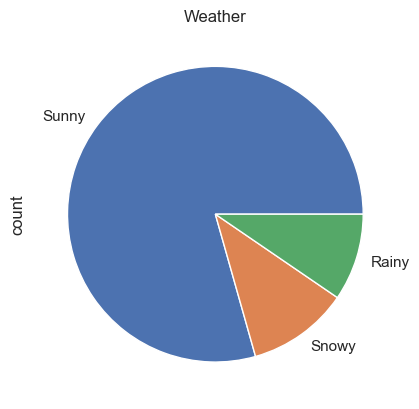

In [25]:
df['weather'].value_counts().plot(kind='pie').set_title('Weather')


In [26]:
weather = df.groupby(['weather', 'Y']).size().unstack()
weather

Y,0,1
weather,,
Rainy,650,560
Snowy,744,661
Sunny,4080,5989


There is about a 50/50 split for people accepting the coupon based on the weather, so we can see that there is no direct correlation between the two visalized features above.

#### toCoupon_GEQ5min

Text(0.5, 1.0, 'toCoupon_GEQ5min')

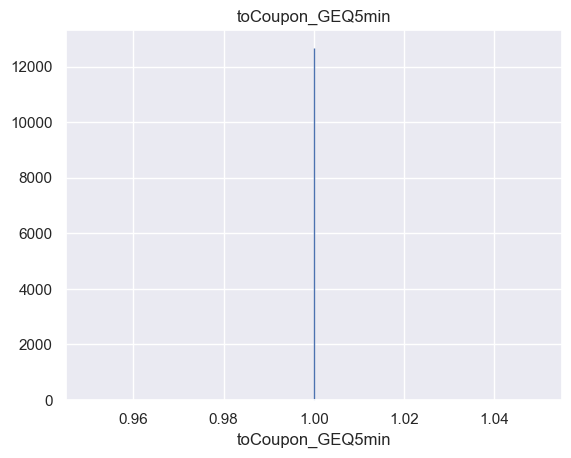

In [27]:
df['toCoupon_GEQ5min'].value_counts().plot(kind='area').set_title('toCoupon_GEQ5min')

The values of `toCoupon_GEQ5min` are all 1 so we can drop this column as it does not provide valuable data. 

In [28]:
df = df.drop(columns=['toCoupon_GEQ5min'])

Now we have 23 features to work with.

# Categorical string to int
Employing LabelEncoder, all string-based categorical data were transformed into numerical formats. This step is crucial for the Decision Tree Classifier, as it operates on numerical inputs, enabling it to process and learn from these categorical features effectively.

In [29]:
dtypes = df.dtypes #Data Types for each column
columns = df.columns # Columns in dataframe
for x in columns:
    if dtypes[x] == object: #If the values are not continous
        print("Column:",x, '\n', " String categories:",df[x].unique()) #Print old string categories
        le = preprocessing.LabelEncoder() #Init LabelEncoder
        le.fit(df[x].unique()) #Fit it with the unique values in the dataframe column
        df[x] = le.transform(df[x]) #Transform them into their integer values
        print( "  Int categories:",df[x].unique()) #Print new values

Column: destination 
  String categories: ['No Urgent Place' 'Home' 'Work']
  Int categories: [1 0 2]
Column: passanger 
  String categories: ['Alone' 'Friend(s)' 'Kid(s)' 'Partner']
  Int categories: [0 1 2 3]
Column: weather 
  String categories: ['Sunny' 'Rainy' 'Snowy']
  Int categories: [2 0 1]
Column: time 
  String categories: ['2PM' '10AM' '6PM' '7AM' '10PM']
  Int categories: [2 0 3 4 1]
Column: coupon 
  String categories: ['Restaurant(<20)' 'Coffee House' 'Carry out & Take away' 'Bar'
 'Restaurant(20-50)']
  Int categories: [4 2 1 0 3]
Column: expiration 
  String categories: ['1d' '2h']
  Int categories: [0 1]
Column: gender 
  String categories: ['Female' 'Male']
  Int categories: [0 1]
Column: age 
  String categories: ['21' '46' '26' '31' '41' '50plus' '36' 'below21']
  Int categories: [0 5 1 2 4 6 3 7]
Column: maritalStatus 
  String categories: ['Unmarried partner' 'Single' 'Married partner' 'Divorced' 'Widowed']
  Int categories: [3 2 1 0 4]
Column: education 
  Strin

In [30]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12684 entries, 0 to 12683
Data columns (total 24 columns):
 #   Column                Non-Null Count  Dtype
---  ------                --------------  -----
 0   destination           12684 non-null  int32
 1   passanger             12684 non-null  int32
 2   weather               12684 non-null  int32
 3   temperature           12684 non-null  int64
 4   time                  12684 non-null  int32
 5   coupon                12684 non-null  int32
 6   expiration            12684 non-null  int32
 7   gender                12684 non-null  int32
 8   age                   12684 non-null  int32
 9   maritalStatus         12684 non-null  int32
 10  has_children          12684 non-null  int64
 11  education             12684 non-null  int32
 12  occupation            12684 non-null  int32
 13  income                12684 non-null  int32
 14  Bar                   12684 non-null  int32
 15  CoffeeHouse           12684 non-null  int32
 16  Carr

Now we have all our columns in numerical form with both continous and categorical data. 

# Data Correlation
Lets test the correlation between the data and find the most correlated feature to our result <br>
The heatmap and pairplot provided a bird's-eye view of potential relationships between variables. However, a deeper dive into this analysis could unearth more nuanced correlations, possibly revealing hidden influences on coupon acceptance that aren't immediately apparent.

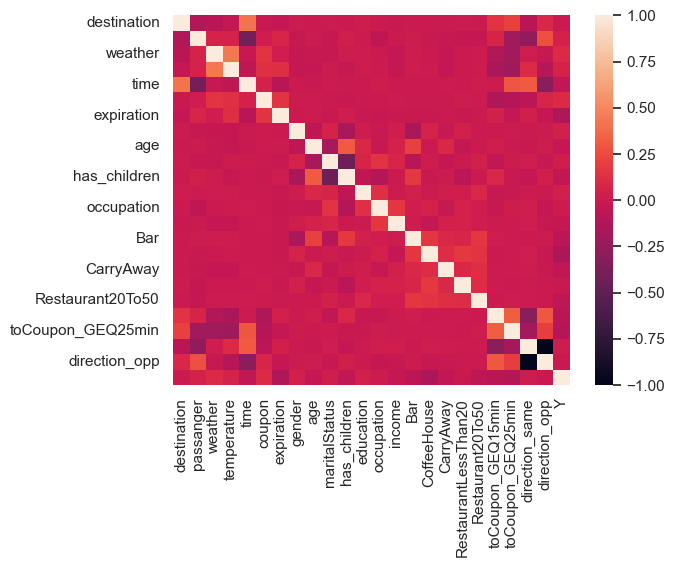

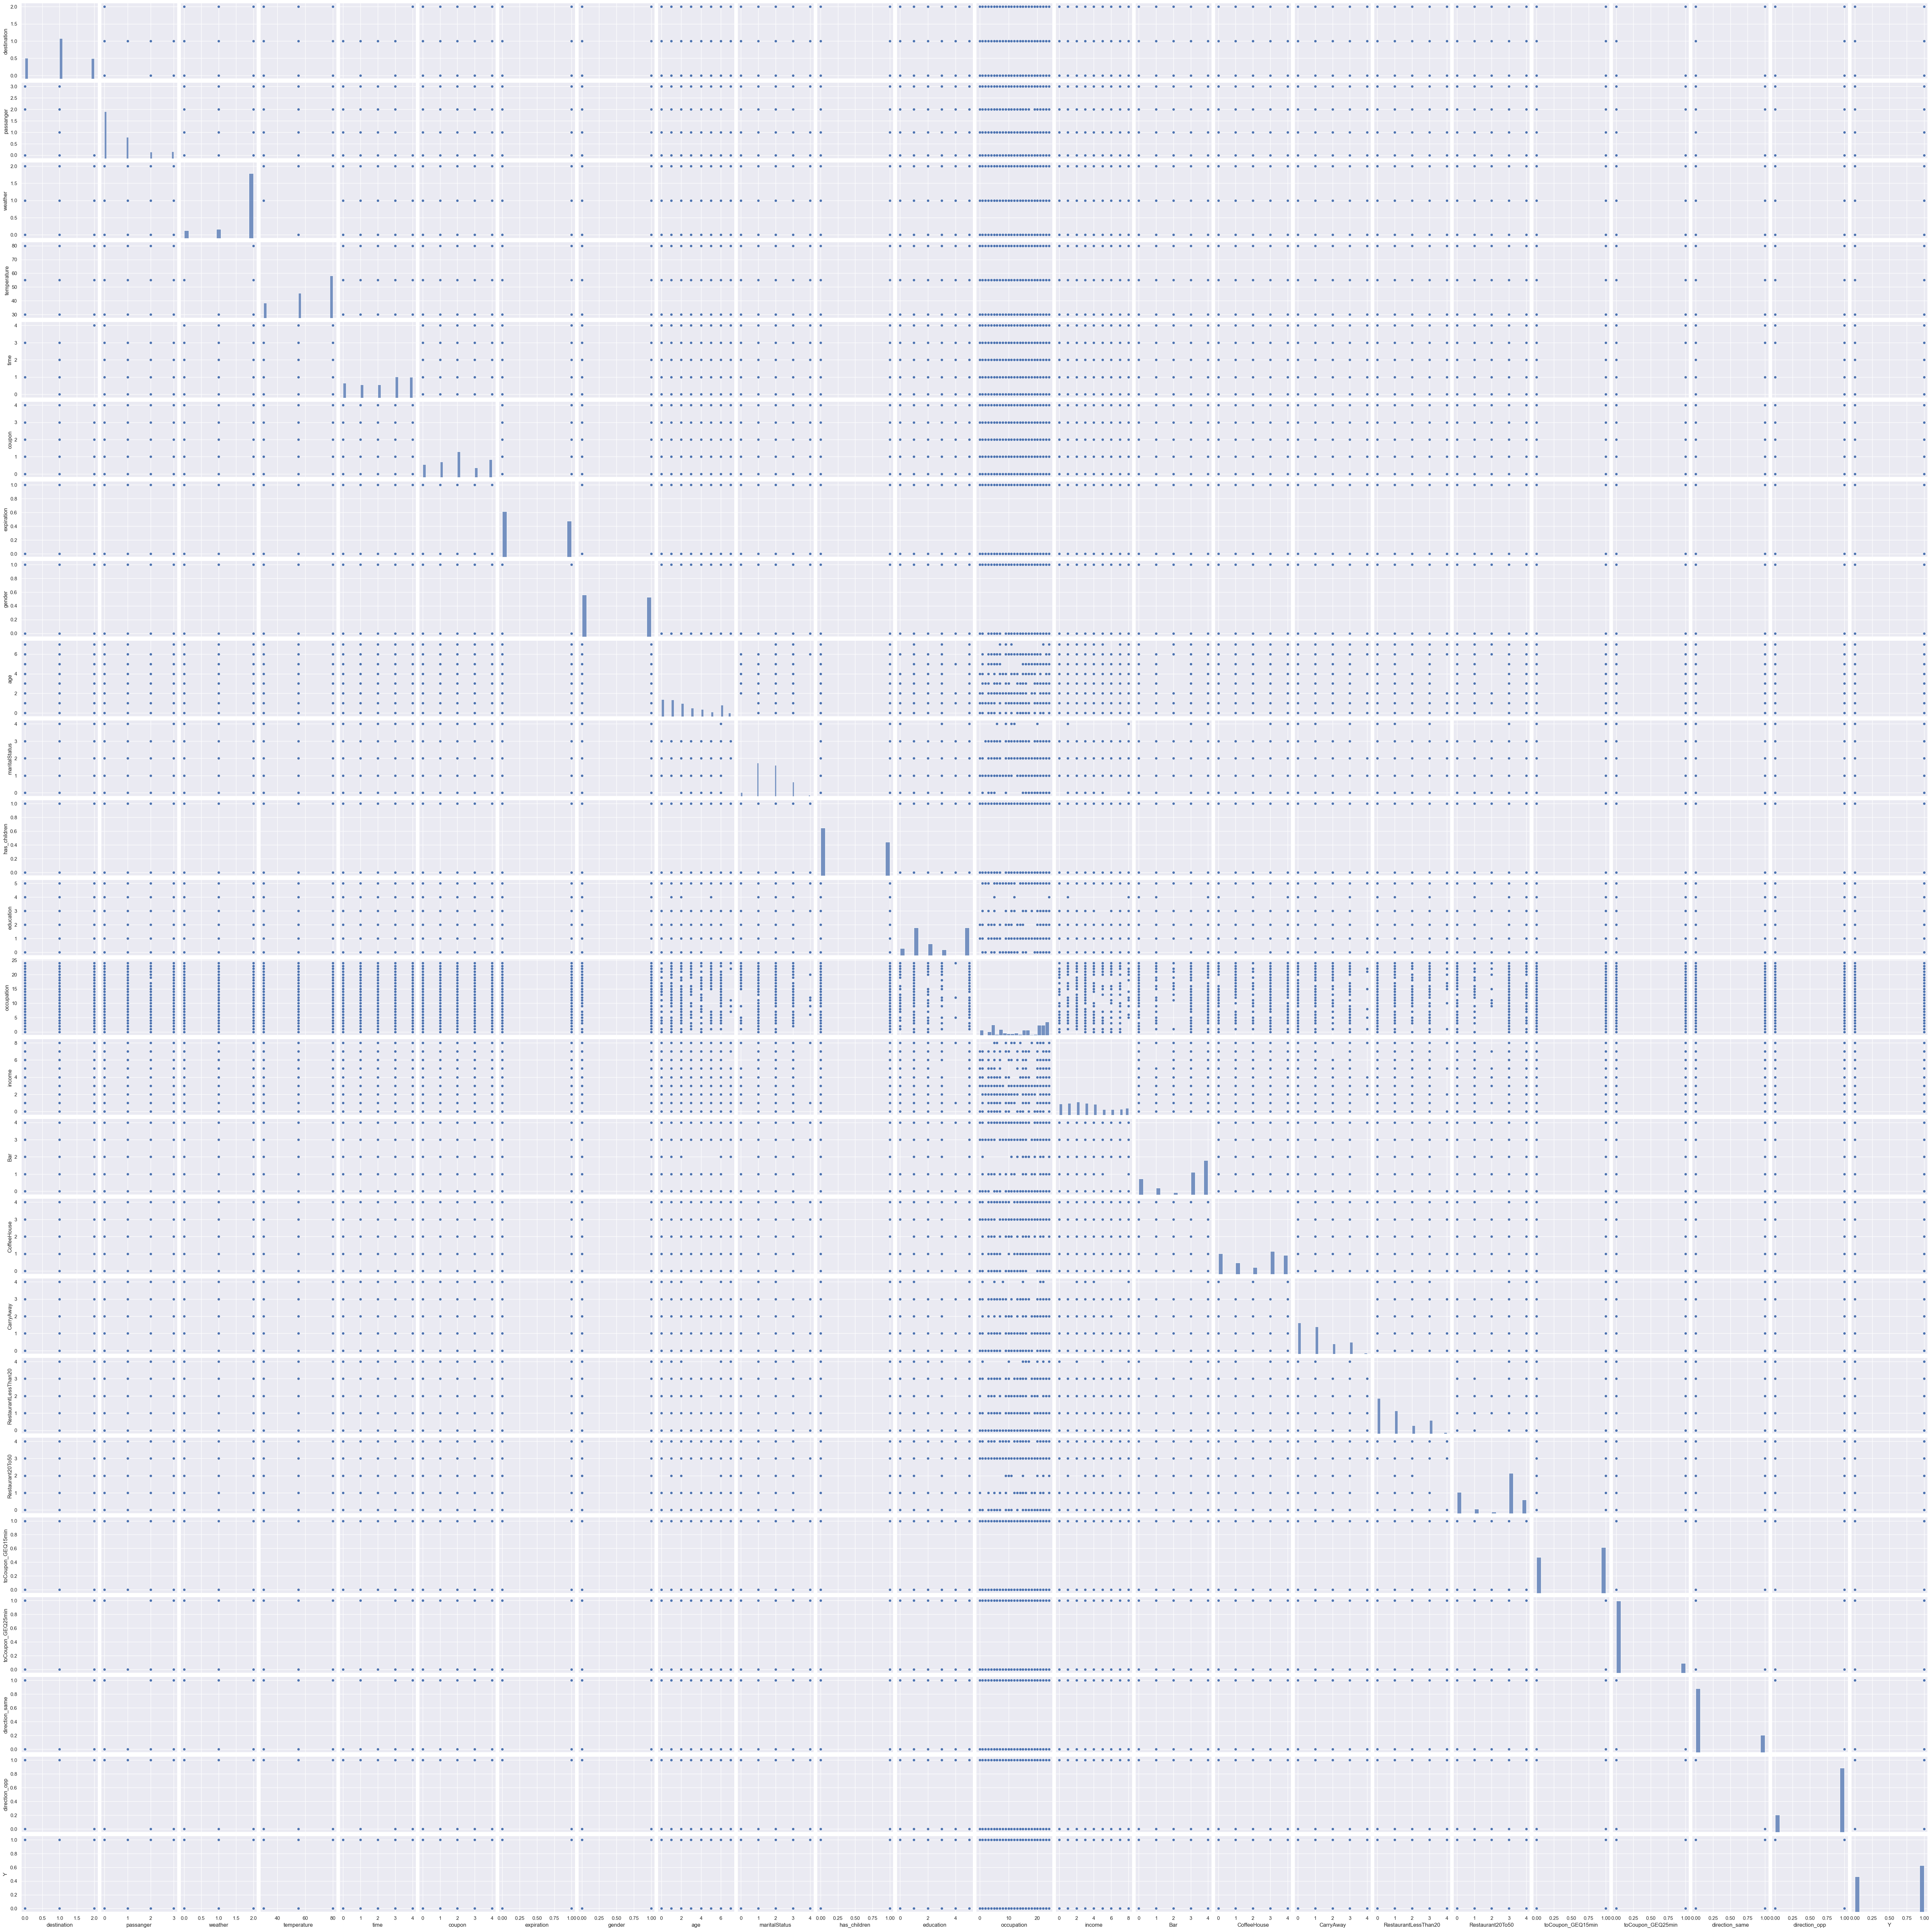

In [31]:
sns.heatmap(df.corr()) #Heatmap for correlations in dataframe
sns.pairplot(df) #Pairplot for correlations in dataframe

In [32]:
#Y is the last column/row in the correlation above, we can quantify it below:
correlation = df.corr()['Y']
print(correlation.sort_values(ascending=False))

Y                       1.000000
weather                 0.098800
coupon                  0.097019
temperature             0.061240
passanger               0.051614
gender                  0.043969
education               0.043023
maritalStatus           0.025083
direction_same          0.014570
occupation              0.007521
destination            -0.001906
RestaurantLessThan20   -0.011137
direction_opp          -0.014570
income                 -0.023949
age                    -0.035241
has_children           -0.045557
time                   -0.047377
CarryAway              -0.048717
Restaurant20To50       -0.056268
Bar                    -0.076033
toCoupon_GEQ15min      -0.081602
toCoupon_GEQ25min      -0.103633
expiration             -0.129920
CoffeeHouse            -0.144629
Name: Y, dtype: float64


Even the most correlated feature is not correlated enough to utilize a Linear model, but lets test it with some of the features:

In [33]:
model = smf.ols(formula='Y ~ weather + coupon + CoffeeHouse ', data=df)
 
res = model.fit() #update this value according to the result
print(res.summary())

                            OLS Regression Results                            
Dep. Variable:                      Y   R-squared:                       0.037
Model:                            OLS   Adj. R-squared:                  0.037
Method:                 Least Squares   F-statistic:                     164.4
Date:                Tue, 12 Dec 2023   Prob (F-statistic):          1.55e-104
Time:                        13:30:41   Log-Likelihood:                -8844.0
No. Observations:               12684   AIC:                         1.770e+04
Df Residuals:                   12680   BIC:                         1.773e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept       0.4889      0.015     33.555      

Above is a Linear Model for testing the highest correlated features, even then we don't have enough to predict future values based solely on `weather`, `coupon`, and `expiration`. So we need to use Decision Tree Classifier to have the best use of all features.

# Initial Model Building - Decision Tree Classifier

First, we move the features and the result into x and y respectively

In [34]:
#Split data into parameters and result 
x = df.drop(columns='Y').copy()
y = df[['Y']].copy()

print(x.info())
# print(y.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12684 entries, 0 to 12683
Data columns (total 23 columns):
 #   Column                Non-Null Count  Dtype
---  ------                --------------  -----
 0   destination           12684 non-null  int32
 1   passanger             12684 non-null  int32
 2   weather               12684 non-null  int32
 3   temperature           12684 non-null  int64
 4   time                  12684 non-null  int32
 5   coupon                12684 non-null  int32
 6   expiration            12684 non-null  int32
 7   gender                12684 non-null  int32
 8   age                   12684 non-null  int32
 9   maritalStatus         12684 non-null  int32
 10  has_children          12684 non-null  int64
 11  education             12684 non-null  int32
 12  occupation            12684 non-null  int32
 13  income                12684 non-null  int32
 14  Bar                   12684 non-null  int32
 15  CoffeeHouse           12684 non-null  int32
 16  Carr

Then we provide a 80/20 split for trainging and testing data

In [35]:
#Split data into training and testing 
x_train, x_test, y_train, y_test = train_test_split(x, y, train_size=0.8)


In [36]:
x_train.head()

,destination,passanger,weather,temperature,time,coupon,expiration,gender,age,maritalStatus,...,income,Bar,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp
5488,0,0,2,80,3,4,1,0,4,2,...,1,4,3,3,3,4,0,0,1,0
5127,1,0,2,80,0,0,0,1,0,2,...,4,3,4,1,3,4,0,0,0,1
12429,0,0,0,55,1,2,1,1,2,1,...,0,0,3,1,0,1,0,0,1,0
5183,0,0,2,80,1,4,1,0,6,2,...,1,4,4,1,1,3,0,0,1,0
7746,0,0,2,80,3,0,1,1,0,3,...,4,3,4,0,1,0,0,0,1,0


With the data ready, we can then run random parameters on the DTC and view the accuracy score

The Decision Tree Classifier was chosen for its ability to handle both categorical and numerical data and its intrinsic feature of interpreting complex datasets with multiple features. This model serves as an excellent starting point for our analysis.

In [37]:
#Decision Tree Classifier with random initial parameters 
classifier = DecisionTreeClassifier(max_depth=10, random_state=14)
classifier.fit(x_train, y_train)
pred = classifier.predict(x_test)
acc_score = accuracy_score(y_true=y_test, y_pred = pred)

print("Accuracy Score for initial DTC:", acc_score)

Accuracy Score for initial DTC: 0.6823019314150571


## Model Optimization using GridSearchCV <br>

GridSearchCV was pivotal in fine-tuning the model's parameters, like max_depth and criterion. This systematic approach to optimization ensured that the model was not just a good fit for the training data but also generalized well to unseen data.

In [38]:
parameters = {'max_depth' : np.arange(3,10),
             'criterion': ['gini', 'entropy'],
              'max_leaf_nodes' : [5,10,15,20,50,100],
              'min_samples_split' : [2,4,5,10,15,20]
             }
grid_search_tree = GridSearchCV(DecisionTreeClassifier(), parameters, scoring="accuracy")

grid_search_tree.fit(x_train, y_train)

print("Best Estimator values:", grid_search_tree.best_estimator_)

print('Best Score:', np.abs(grid_search_tree.best_score_))

Best Estimator values: DecisionTreeClassifier(max_depth=8, max_leaf_nodes=100, min_samples_split=20)
Best Score: 0.7093728134172721


With the best parameters provided to us above, we can then use that model to predict the test data and get the accuracy score

In [41]:
#Testing the best scoring parameters from above with test value:

classifier = DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=9, max_features=None, max_leaf_nodes=100,
                       min_impurity_decrease=0.0,
                       min_samples_leaf=1, min_samples_split=15,
                       min_weight_fraction_leaf=0.0,
                       random_state=None, splitter='best')

classifier.fit(x_train, y_train)
pred = classifier.predict(x_test)
acc_score = accuracy_score(y_true=y_test, y_pred = pred)
f_score = f1_score(y_true=y_test, y_pred=pred)
print("Accuracy Score Optimized Parameters:", acc_score)
print("F1 Score Optimized Parameters:", f_score)


Accuracy Score Optimized Parameters: 0.6957035869136776
F1 Score Optimized Parameters: 0.7506459948320413


With the test data we get around the same accuracy score, now lets look at the most important features below:

The analysis revealed that the type of coupon offered was a significant determinant of acceptance. Additionally, the frequency of visits to a coffee house emerged as a surprisingly influential factor. These insights could guide businesses in tailoring their marketing strategies more effectively.

In [42]:
#Feature importance
features = x.columns
scores = classifier.feature_importances_.tolist()
res = pd.DataFrame({'features' : features, 'score': scores})
res = res.sort_values(by=['score'], ascending=False)
print(res)

                features     score
5                 coupon  0.318666
14                   Bar  0.116425
15           CoffeeHouse  0.114204
6             expiration  0.082086
20     toCoupon_GEQ25min  0.059743
4                   time  0.053423
8                    age  0.034698
12            occupation  0.027567
1              passanger  0.024826
0            destination  0.019260
2                weather  0.018179
13                income  0.017917
19     toCoupon_GEQ15min  0.016363
11             education  0.016112
16             CarryAway  0.015179
9          maritalStatus  0.014918
18      Restaurant20To50  0.013694
22         direction_opp  0.012296
21        direction_same  0.010815
7                 gender  0.005961
3            temperature  0.004362
17  RestaurantLessThan20  0.003307
10          has_children  0.000000


We can thus conclude that the most important identifier from the Decision Tree Classifier model is the type of coupon that is presented to the customer, the frequency the person accepting the coupon goes to a Coffe House within a month, and if the driving time to the establishment is >=25 minutes.

We can see how our models accuracy will be if we choose the top 1, 2, 3 features provided above. 

In [43]:
#models with top 1, 2, & 3 features
top_1 = df[['coupon']].copy()
top_2 = df[['coupon', 'Bar']].copy()
top_3 = df[['coupon', 'Bar', 'income']].copy()

x_train_1, x_test_1, y_train_1, y_test_1 = train_test_split(top_1,y, test_size=.2)
x_train_2, x_test_2, y_train_2, y_test_2 = train_test_split(top_2,y, test_size=.2)
x_train_3, x_test_3, y_train_3, y_test_3 = train_test_split(top_3,y, test_size=.2)

classifier.fit(x_train_1, y_train_1)
pred1 = classifier.predict(x_test_1)
acc_score1 = accuracy_score(y_true=y_test_1, y_pred = pred1)
print("With the top (1) feature, accuracy score = ", acc_score1)

classifier.fit(x_train_2, y_train_2)
pred2 = classifier.predict(x_test_2)
acc_score2 = accuracy_score(y_true=y_test_2, y_pred = pred2)
print("With the top (2) features, accuracy score = ", acc_score2)

classifier.fit(x_train_3, y_train_3)
pred3 = classifier.predict(x_test_3)
acc_score3 = accuracy_score(y_true=y_test_3, y_pred = pred3)
print("With the top (3) features, accuracy score = ", acc_score3)

With the top (1) feature, accuracy score =  0.6137169885691762
With the top (2) features, accuracy score =  0.6200236499802917
With the top (3) features, accuracy score =  0.6519511233740638


Accuracy fluctuates with the addition of additional parameters. But, there is an increase in accuracy as we add more features.

## Confusion Matrix and Further Model Tuning
For the optimized DTC model we created above, we want to view how we can improve the values of FN and FP. First lets view the amounts for those:

By evaluating the model's performance through a confusion matrix, we gained clarity on its predictive accuracy. Iterating on this with a focus on reducing false negatives and false positives, we aimed to balance precision and recall, further enhancing the model's applicability.

In [44]:
#Confusion Matrix
cm = sklearn.metrics.confusion_matrix(y_test, pred)
print(cm)

TP = 0
FP = 0
TN = 0
FN = 0

y_true = y_test.values.tolist()
pos_label_value = 1
for l in range(len(pred)):
    predicted = pred[l]
    true = y_true[l][0]
    if predicted == pos_label_value and true == pos_label_value:
        TP += 1
    elif predicted == pos_label_value and true != pos_label_value:
        FP += 1
    elif predicted != pos_label_value and true == pos_label_value:
        FN += 1
    elif predicted != pos_label_value and true != pos_label_value:
        TN += 1
print("TP = ", TP)
print("FP = ", FP)
print("TN = ", TN)
print("FN = ", FN)

[[ 603  519]
 [ 253 1162]]
TP =  1162
FP =  519
TN =  603
FN =  253


To improve those amounts we can change the GridSearchCV scoring to f1 instaed of accuracy to the predictions. This should help us to predict the TP and TN values a bit better. 

In [45]:
parameters = {'max_depth' : np.arange(3,10),
             'criterion': ['gini', 'entropy'],
              'max_leaf_nodes' : [5,10,15,20,50,100],
              'min_samples_split' : [2,4,5,10,15,20]
             }
grid_search_tree = GridSearchCV(DecisionTreeClassifier(), parameters, scoring="f1")

grid_search_tree.fit(x_train, y_train)

print("Best Estimator values:", grid_search_tree.best_estimator_)

print('Best Score:', np.abs(grid_search_tree.best_score_))

Best Estimator values: DecisionTreeClassifier(criterion='entropy', max_depth=9, max_leaf_nodes=50)
Best Score: 0.7635151009949427


In [46]:
classifier = DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=7, max_features=None, max_leaf_nodes=50,
                       min_impurity_decrease=0.0,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0,
                       random_state=None, splitter='best')

classifier.fit(x_train, y_train)
pred = classifier.predict(x_test)
acc_score = accuracy_score(y_true=y_test, y_pred = pred)
f_score = f1_score(y_true=y_test, y_pred=pred)
print("Accuracy Score Optimized Parameters:", acc_score)
print("F1 Score Optimized Parameters:", f_score)

Accuracy Score Optimized Parameters: 0.6925502562081198
F1 Score Optimized Parameters: 0.7401732178547634


In [47]:
features = x_train.columns
scores = classifier.feature_importances_.tolist()
res = pd.DataFrame({'features' : features, 'score': scores})
res = res.sort_values(by=['score'], ascending=False)
print(res)

                features     score
5                 coupon  0.377505
14                   Bar  0.129483
15           CoffeeHouse  0.123840
6             expiration  0.098295
20     toCoupon_GEQ25min  0.071539
4                   time  0.050432
22         direction_opp  0.027675
8                    age  0.026281
0            destination  0.020226
1              passanger  0.011334
9          maritalStatus  0.010712
13                income  0.008816
2                weather  0.007688
16             CarryAway  0.007668
7                 gender  0.007138
12            occupation  0.006408
19     toCoupon_GEQ15min  0.005228
3            temperature  0.005223
18      Restaurant20To50  0.004510
10          has_children  0.000000
17  RestaurantLessThan20  0.000000
21        direction_same  0.000000
11             education  0.000000


In [48]:
#Confusion Matrix
cm = sklearn.metrics.confusion_matrix(y_test, pred)
print(cm)

TP_new = 0
FP_new = 0
TN_new = 0
FN_new = 0

y_true = y_test.values.tolist()
pos_label_value = 1
for x in range(len(pred)):
    predicted = pred[x]
    true = y_true[x][0]
    if predicted == pos_label_value and true == pos_label_value:
        TP_new += 1
    elif predicted == pos_label_value and true != pos_label_value:
        FP_new += 1
    elif predicted != pos_label_value and true == pos_label_value:
        FN_new += 1
    elif predicted != pos_label_value and true != pos_label_value:
        TN_new += 1
print("New TP = ", TP_new)
print("New FP = ", FP_new)
print("New TN = ", TN_new)
print("New FN = ", FN_new)


[[ 646  476]
 [ 304 1111]]
New TP =  1111
New FP =  476
New TN =  646
New FN =  304


To compare those values we can see the following:

TP =  1136, New TP =  1159

FP =  423, New FP =  467

TN =  649, New TN =  605

FN =  329, New FN =  306

Both False Negatives and true Negatives decreased, while False Positives and True Positives increased. This may be a favorable for this model and dataset as we prefer to include more people into positive to provide them with the ability to accept the coupon despite them being a possible negative as they may be persuaded by further external factors not included in this dataset. 

### Feature Engineering and Model Re-Run

We embarked on creating new features by combining existing ones, such as merging 'direction_same' and 'direction_opp'.<br> This not only reduced the feature space but also aimed to uncover more significant predictors by synthesizing new, meaningful attributes.

In [49]:
fe_df = df.copy()
fe_df['direction'] = 0
fe_df.loc[((fe_df.direction_opp == 1) & (fe_df.direction_same == 0)), 'direction'] = 0 # Opposite direction
fe_df.loc[((fe_df.direction_opp == 0) & (fe_df.direction_same == 1)), 'direction'] = 1 # Same direction
fe_df = fe_df.drop(columns=['direction_same', 'direction_opp'])

Next we will make the passenger column to be a binary, to make it more of an observable feature:

In [50]:
fe_df['b_passanger'] = 0
fe_df.loc[((fe_df['passanger'] == 0), 'b_passanger')] = 0
fe_df.loc[((fe_df['passanger'] == 1) | (fe_df['passanger'] == 2) | (fe_df['passanger'] == 3), 'b_passanger')] = 1
fe_df = fe_df.drop(columns=['passanger'])
fe_df = fe_df.rename(columns={'b_passanger' : 'new_passanger'})

Finally, we want to combine the columns `toCoupon_GEQ15min` and `toCoupon_GEQ25min`:

In [51]:
fe_df['toCoupon'] = 0
fe_df.loc[((fe_df['toCoupon_GEQ15min'] == 0) & (fe_df['toCoupon_GEQ25min'] == 0), 'toCoupon')] = 0 # Less than 15 mins
fe_df.loc[((fe_df['toCoupon_GEQ15min'] == 1) & (fe_df['toCoupon_GEQ25min'] == 0), 'toCoupon')] = 1 # between 15 and 25
fe_df.loc[((fe_df['toCoupon_GEQ15min'] == 1) & (fe_df['toCoupon_GEQ25min'] == 1), 'toCoupon')] = 2 # Greater than 25
fe_df = fe_df.drop(columns=['toCoupon_GEQ15min', 'toCoupon_GEQ25min'])

In [52]:
fe_df = fe_df[['destination', 'new_passanger', 'weather', 'temperature', 'direction', 'time', 'coupon', 'expiration', 'toCoupon', 'Y']].copy()

In [53]:
fe_df.head()

,destination,new_passanger,weather,temperature,direction,time,coupon,expiration,toCoupon,Y
0,1,0,2,55,0,2,4,0,0,1
1,1,1,2,80,0,0,2,1,0,0
2,1,1,2,80,0,0,1,1,1,1
3,1,1,2,80,0,2,2,1,1,0
4,1,1,2,80,0,2,2,0,1,0


## Feature Engineered visualization

Lets take a look into the combined columns:

<Axes: ylabel='direction'>

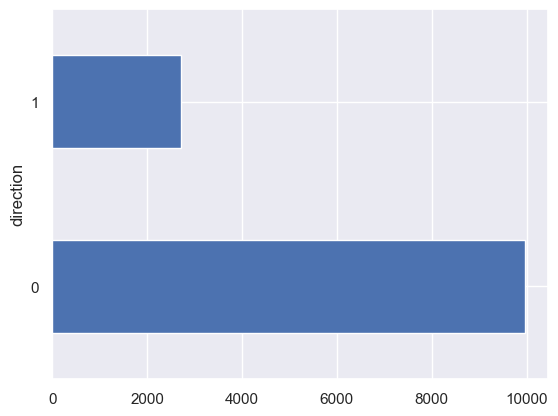

In [54]:
fe_df['direction'].value_counts().plot(kind='barh')

In [55]:
direction = fe_df.groupby(['direction', 'Y']).size().unstack()
direction

Y,0,1
direction,,
0,4336,5624
1,1138,1586


<Axes: xlabel='new_passanger'>

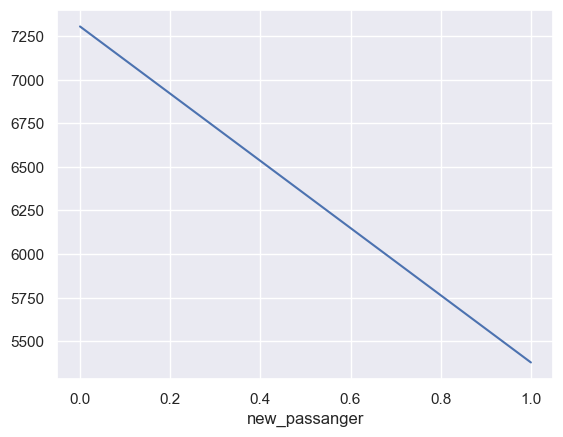

In [56]:
fe_df['new_passanger'].value_counts().plot(kind='line')

In [57]:
passanger = fe_df.groupby(['new_passanger', 'Y']).size().unstack()
passanger

Y,0,1
new_passanger,,
0,3464,3841
1,2010,3369


### Re-run model on new dataset

In [59]:
fe_x = fe_df.drop(columns='Y').copy()
fe_y = fe_df[['Y']].copy()

In [60]:
x_train, x_test, y_train, y_test = train_test_split(fe_x, fe_y, train_size=0.8)

In [61]:
parameters = {'max_depth' : np.arange(3,10),
             'criterion': ['gini', 'entropy'],
              'max_leaf_nodes' : [5,10,15,20,50,100],
              'min_samples_split' : [2,4,5,10,15,20]
             }
grid_search_tree = GridSearchCV(DecisionTreeClassifier(), parameters, scoring="accuracy")

grid_search_tree.fit(x_train, y_train)

print("Best Estimator values:", grid_search_tree.best_estimator_)

print('Best Score:', np.abs(grid_search_tree.best_score_))

Best Estimator values: DecisionTreeClassifier(criterion='entropy', max_depth=9, max_leaf_nodes=100)
Best Score: 0.668669853624902


In [62]:
classifier = DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=9, max_features=None, max_leaf_nodes=100,
                       min_impurity_decrease=0.0,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0,
                       random_state=None, splitter='best')

classifier.fit(x_train, y_train)
pred = classifier.predict(x_test)
acc_score = accuracy_score(y_true=y_test, y_pred = pred)
f_score = f1_score(y_true=y_test, y_pred=pred)
print("Accuracy Score Optimized Parameters:", acc_score)
print("F1 Score Optimized Parameters:", f_score)

Accuracy Score Optimized Parameters: 0.6771777690185258
F1 Score Optimized Parameters: 0.7201913221728733


In [63]:
features = x_train.columns
scores = classifier.feature_importances_.tolist()
res = pd.DataFrame({'features' : features, 'score': scores})
res = res.sort_values(by=['score'], ascending=False)
print("Feature importance")
print(res)

Feature importance
        features     score
6         coupon  0.418184
5           time  0.146018
8       toCoupon  0.143009
7     expiration  0.092274
0    destination  0.064598
4      direction  0.049733
3    temperature  0.041555
2        weather  0.038368
1  new_passanger  0.006262


In [64]:
cm = sklearn.metrics.confusion_matrix(y_test, pred)
print(cm)

fe_TP = 0
fe_FP = 0
fe_TN = 0
fe_FN = 0

y_true = y_test.values.tolist()
pos_label_value = 1
for x in range(len(pred)):
    predicted = pred[x]
    true = y_true[x][0]
    if predicted == pos_label_value and true == pos_label_value:
        fe_TP += 1
    elif predicted == pos_label_value and true != pos_label_value:
        fe_FP += 1
    elif predicted != pos_label_value and true == pos_label_value:
        fe_FN += 1
    elif predicted != pos_label_value and true != pos_label_value:
        fe_TN += 1
print("With max accuracy we get:")
print("FE Acc TP = ", fe_TP)
print("FE Acc FP = ", fe_FP)
print("FE Acc TN = ", fe_TN)
print("FE Acc FN = ", fe_FN)

[[ 664  453]
 [ 366 1054]]
With max accuracy we get:
FE Acc TP =  1054
FE Acc FP =  453
FE Acc TN =  664
FE Acc FN =  366


In [65]:
parameters = {'max_depth' : np.arange(3,10),
             'criterion': ['gini', 'entropy'],
              'max_leaf_nodes' : [5,10,15,20,50,100],
              'min_samples_split' : [2,4,5,10,15,20]
             }
grid_search_tree = GridSearchCV(DecisionTreeClassifier(), parameters, scoring="f1")

grid_search_tree.fit(x_train, y_train)

print("Best Estimator values:", grid_search_tree.best_estimator_)

print('Best Score:', np.abs(grid_search_tree.best_score_))

Best Estimator values: DecisionTreeClassifier(max_depth=6, max_leaf_nodes=50)
Best Score: 0.7223315825589133


The final evaluation encompassed various metrics, not just focusing on accuracy but also considering the F1 score. This holistic view of the model's performance offered a more nuanced understanding of its strengths and limitations in predicting coupon acceptance.

In [67]:
classifier = DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=6, max_features=None, max_leaf_nodes=50,
                       min_impurity_decrease=0.0, 
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, 
                       random_state=None, splitter='best')

classifier.fit(x_train, y_train)
pred = classifier.predict(x_test)
acc_score = accuracy_score(y_true=y_test, y_pred = pred)
f_score = f1_score(y_true=y_test, y_pred=pred)
print("Accuracy Score Optimized Parameters:", acc_score)
print("F1 Score Optimized Parameters:", f_score)

Accuracy Score Optimized Parameters: 0.6728419392983839
F1 Score Optimized Parameters: 0.724252491694352


In [68]:
features = x_train.columns
scores = classifier.feature_importances_.tolist()
res = pd.DataFrame({'features' : features, 'score': scores})
res = res.sort_values(by=['score'], ascending=False)
print("Feature importance")
print(res)

Feature importance
        features     score
6         coupon  0.442140
7     expiration  0.163826
5           time  0.153236
8       toCoupon  0.094716
0    destination  0.062527
4      direction  0.035569
3    temperature  0.027348
2        weather  0.016791
1  new_passanger  0.003845


In [69]:
cm = sklearn.metrics.confusion_matrix(y_test, pred)
print(cm)

fe_TP = 0
fe_FP = 0
fe_TN = 0
fe_FN = 0

y_true = y_test.values.tolist()
pos_label_value = 1
for x in range(len(pred)):
    predicted = pred[x]
    true = y_true[x][0]
    if predicted == pos_label_value and true == pos_label_value:
        fe_TP += 1
    elif predicted == pos_label_value and true != pos_label_value:
        fe_FP += 1
    elif predicted != pos_label_value and true == pos_label_value:
        fe_FN += 1
    elif predicted != pos_label_value and true != pos_label_value:
        fe_TN += 1
print("With max f1 we get:")
print("FE f1 TP = ", fe_TP)
print("FE f1 FP = ", fe_FP)
print("FE f1 TN = ", fe_TN)
print("FE f1 FN = ", fe_FN)

[[ 617  500]
 [ 330 1090]]
With max f1 we get:
FE f1 TP =  1090
FE f1 FP =  500
FE f1 TN =  617
FE f1 FN =  330


Now that we only ran our model on observable features, we can see that the model improved, and will help the people passing out the coupons to use their observation skills, and decision for time and direction to pass out the coupons more effectively to people that are more likely to 

# Conclusions

The model before feature engineering may not be the best even after the changes made to be more focused on f1-score rather than accuracy. But, having more positives than negatives in this situation is not the worse as it would lead to more wasted time of offering coupons to those that may not accept them, but it also will lead to more true positive outcomes. 

After choosing only the obersable features we got a worse model, but unless we have a camera that views into the car and gives us the backstory and details for each person it will not be a practical model. This way we can provide those employees with the insight into what factors that they can observe to offer a coupon to a driver that is more likely to accept a coupon and improve their effeciency. 

The project's journey highlighted the multifaceted nature of predicting human behavior in the context of coupon acceptance. While the current model offers valuable insights, future explorations could include experimenting with different algorithms, like Random Forests or Neural Networks, to potentially uncover deeper patterns in the data.